# 2. 递归问题, 数学归纳法

## Uva177 折纸痕 向量问题简介

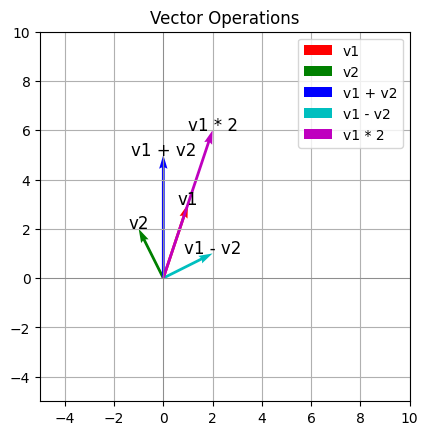

In [2]:
import matplotlib.pyplot as plt

class Vector:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"

def plot_vector(vector, origin=(0, 0), color='r', label=''):
    plt.quiver(origin[0], origin[1], vector.x, vector.y, angles='xy', scale_units='xy', scale=1, color=color)
    plt.text(origin[0] + vector.x, origin[1] + vector.y, label, fontsize=12, ha='center')

def main():
    # 定义向量
    v1 = Vector(1, 3)
    v2 = Vector(-1, 2)

    # 向量操作
    v_add = v1 + v2
    v_sub = v1 - v2
    v_mul = v1 * 2

    # 绘制向量
    plt.figure()
    plot_vector(v1, color='r', label='v1')
    plot_vector(v2, color='g', label='v2')
    plot_vector(v_add, color='b', label='v1 + v2')
    plot_vector(v_sub, color='c', label='v1 - v2')
    plot_vector(v_mul, color='m', label='v1 * 2')

    # 设置图形属性
    plt.xlim(-5, 10)
    plt.ylim(-5, 10)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(['v1', 'v2', 'v1 + v2', 'v1 - v2', 'v1 * 2'])
    plt.title('Vector Operations')
    plt.show()

if __name__ == '__main__':
    main()


Original Point: Point(2, 3)
Rotated Point: Point(0.5950054637431963, 3.199086043246634)


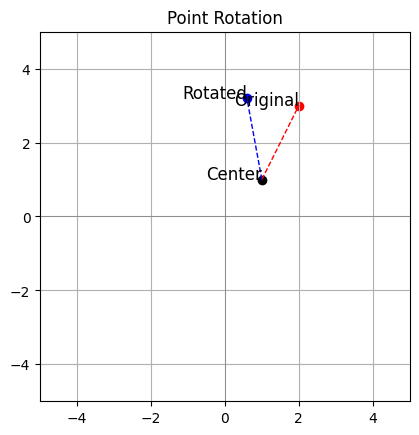

In [4]:
import matplotlib.pyplot as plt
import numpy as np

class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Point({self.x}, {self.y})"

def rotate_point(p, center, angle):
    """
    计算点 p 绕中心点 center 旋转 angle 角度后的新坐标
    :param p: 要旋转的点
    :param center: 旋转中心
    :param angle: 旋转角度（弧度）
    :return: 旋转后的新点
    """
    s, c = np.sin(angle), np.cos(angle)
    translated_x = p.x - center.x
    translated_y = p.y - center.y
    new_x = center.x + translated_x * c - translated_y * s
    new_y = center.y + translated_x * s + translated_y * c
    return Point(new_x, new_y)

def plot_points(points, center, colors, labels):
    for p, color, label in zip(points, colors, labels):
        plt.scatter(p.x, p.y, color=color)
        plt.text(p.x, p.y, label, fontsize=12, ha='right')
    plt.scatter(center.x, center.y, color='k')
    plt.text(center.x, center.y, 'Center', fontsize=12, ha='right')

def plot_vectors(p, center, rotated_p):
    # 绘制原始点和旋转后的点之间的连线
    plt.plot([center.x, p.x], [center.y, p.y], 'r--', lw=1)
    plt.plot([center.x, rotated_p.x], [center.y, rotated_p.y], 'b--', lw=1)

def main():
    # 定义原始点和旋转中心
    original_point = Point(2, 3)
    center_point = Point(1, 1)
    angle = np.radians(37)  # 旋转 90 度

    # 旋转后的点
    rotated_point = rotate_point(original_point, center_point, angle)

    # 打印旋转前后点的坐标
    print(f"Original Point: {original_point}")
    print(f"Rotated Point: {rotated_point}")

    # 可视化旋转前后的点
    plt.figure()
    plot_points([original_point, rotated_point], center_point, ['r', 'b'], ['Original', 'Rotated'])
    plot_vectors(original_point, center_point, rotated_point)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Point Rotation')
    plt.show()

if __name__ == '__main__':
    main()


In [3]:
import graphviz
import uuid
from functools import wraps
from IPython.display import display

class CallVisualizer:
    def __init__(self):
        self.nodes = []
        self.edges = []
        self.current_call_id = None

    def record_call(self, func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            call_id = str(uuid.uuid4())
            parent_call_id = self.current_call_id
            self.current_call_id = call_id

            # 记录函数名称和参数
            args_repr = [repr(a) for a in args]
            kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]
            signature = ", ".join(args_repr + kwargs_repr)
            label = f"{func.__name__}({signature})"

            self.nodes.append((call_id, label))
            if parent_call_id:
                self.edges.append((parent_call_id, call_id))

            result = func(*args, **kwargs)

            self.current_call_id = parent_call_id
            return result

        return wrapper

    def visualize(self):
        dot = graphviz.Digraph()

        for node, label in self.nodes:
            dot.node(node, label)

        for edge in self.edges:
            dot.edge(*edge)

        display(dot)
        return dot

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


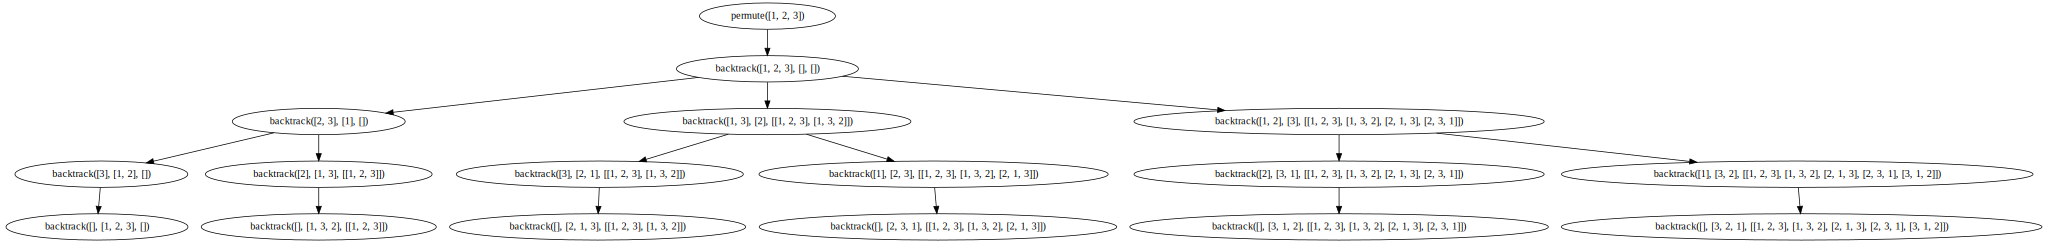

In [6]:
visualizer = CallVisualizer()

@visualizer.record_call
def permute(nums):
    result = []
    backtrack(nums, [], result)
    return result
@visualizer.record_call
def backtrack(nums, path, result):
    if not nums:
        result.append(path)
        return
    for i in range(len(nums)):
        backtrack(nums[:i] + nums[i+1:], path + [nums[i]], result)

# 示例用法
if __name__ == "__main__":
    n = 3
    nums = list(range(1, n + 1))
    permutations = permute(nums)
    for perm in permutations:
        print(perm)
    visualizer.visualize()